# MSGTRAKER

In [11]:
import logging
from conf import LisaLogging
LisaLogging.setup()

2019-12-17 20:38:26,143 INFO    : root         : Using LISA logging configuration:
2019-12-17 20:38:26,144 INFO    : root         :   /home/ubuntu/Android/lisa_old/logging.conf


In [12]:
%pylab inline

import os
from time import sleep

# Support to access the remote target
import devlib
from env import TestEnv

# Import support for Android devices
from android import Screen, Workload

from devlib.utils.android import adb_command

# Support for trace events analysis
from trace import Trace

# Suport for FTrace events parsing and visualization
import trappy
import glob

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

import ipywidgets as widgets
from IPython.display import display

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import Javascript, display

from android import System

import subprocess

from systrace_parser import systrace_parser

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Defines

In [13]:
data_path = '/home/ubuntu/Android/lisa_old/ipynb/performance/testingdata/MSGTRACKER/'
raw_data_file = 'logging.txt'
displayed_data_file = 'logging_displayed.txt'

## Loading data

In [18]:
text_file = open(data_path + raw_data_file, "r")
raw_data_lines = text_file.readlines()
text_file.close()

text_file = open(data_path + displayed_data_file, "r")
displayed_data_lines = text_file.readlines()
text_file.close()

print raw_data_lines[0]
print len(raw_data_lines)
print displayed_data_lines[0]
print len(displayed_data_lines)

12-17 11:10:33.825 21297 21297 W Handler : [MSGTRACKER] com.baidu.searchbox :  110//49  159/ 1/ searchbox.feed.//4  1//1  1/ 1/ 1//2  1//0  1//0  1/ 1//67  lephony.-$$Lamb/ 1/ 1//2  searchbox.feed.//1  1//0 /96  159//0  1//0  1//0  p.-$$Lambda$Loa//1  1//0  1//0  1//0  1//0  rx.a.b.b$b//0  rx.a.b.b$b//0  1//0  1//0  1//0  113294616//0  rx.a.b.b$b/ 200168625/ rx.a.b.b$b//0  rx.a.b.b$b//0  p.-$$Lambda$Loa//4  1//0  ew.ViewRootImpl//0  ew.Choreographe/ 1//1 /11  1//1  1//0  1//0  1//5  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//1  1//1  1//0  1//0  34986781/ 1//0  1//1 /1  1//0  1//0  1//1  1//2  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//2  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//0  1//3  2//1 /131  ew.-$$Lambda$Vi//1  1//0  601//0  194481442//0  114533299//0  rx.a.b.b$b/ 104749319//0  ew.Choreographe//7  rx.a.b.b$b//0  1//0  rx.a.b.b$b//0  rx.a.b.b$b//0  rx.a.b.b$b//0  rx.a.b.b$b//0  rx.a.b.b$b/

## fill dataframe

In [144]:
main_data_list = list()

for line in raw_data_lines :
    sub_data_list = [0, 0]
    count_of_choreo = 0
    items = line.split(' ')
    for item in items :
        if 'Choreograph' in item :
            count_of_choreo += 1
            if count_of_choreo == 2 :
                break
        if '/' in item :
            if len(item.split('/')[0]) > 0 :
                sub_data_list[count_of_choreo] += 1
                
    main_data_list.append(sub_data_list)

idx = 0
for line in displayed_data_lines :
    items = line.split(' ')
    for item in items :
        if 'ms' in item :
            main_data_list[idx].append(int(item.strip("ms\n").strip("+")))
            idx += 1
            break
display(main_data_list)

[[38, 63, 345],
 [38, 41, 329],
 [35, 35, 309],
 [38, 41, 324],
 [38, 57, 324],
 [37, 41, 322],
 [36, 40, 306],
 [32, 38, 287],
 [37, 42, 334],
 [37, 78, 343],
 [37, 39, 324],
 [39, 39, 356],
 [39, 57, 341],
 [39, 39, 336],
 [38, 37, 336],
 [37, 42, 330],
 [37, 42, 320],
 [36, 37, 311],
 [38, 38, 326],
 [39, 42, 330],
 [36, 40, 357],
 [37, 38, 322],
 [37, 42, 347],
 [38, 40, 339],
 [38, 42, 337],
 [39, 96, 335],
 [38, 56, 294],
 [37, 38, 325],
 [37, 42, 324],
 [38, 39, 330],
 [38, 37, 332],
 [38, 37, 322],
 [37, 39, 335],
 [37, 61, 337],
 [37, 96, 314],
 [37, 44, 337],
 [39, 82, 337],
 [38, 60, 335],
 [38, 39, 335],
 [37, 41, 324],
 [38, 58, 291],
 [37, 109, 325],
 [38, 39, 336],
 [37, 42, 320],
 [31, 40, 300],
 [37, 42, 336],
 [38, 41, 323],
 [39, 43, 335],
 [36, 40, 303],
 [36, 39, 325],
 [38, 43, 333],
 [38, 38, 326],
 [38, 41, 329],
 [35, 41, 356],
 [37, 111, 338],
 [39, 43, 345],
 [39, 40, 340],
 [37, 96, 381],
 [37, 39, 319],
 [36, 39, 314],
 [37, 37, 288],
 [38, 38, 346],
 [37, 

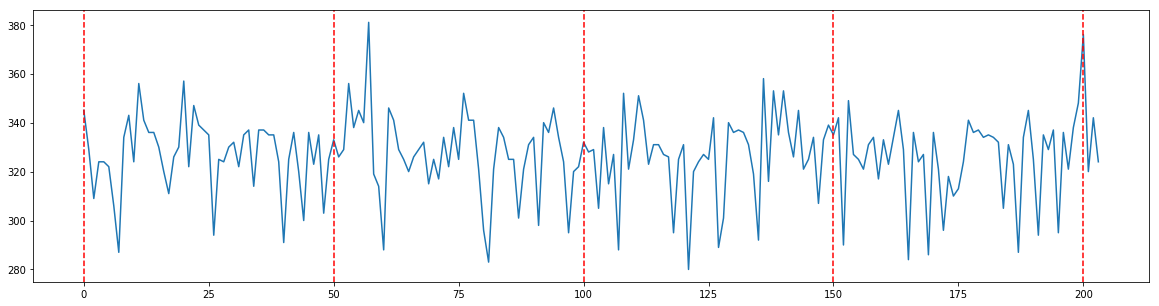

In [145]:
df = pd.DataFrame(main_data_list, columns = ['BindApplication~', 'ActivityStart~', 'LaunchTime']) 

plt.figure(figsize=(20,5))
display(df['LaunchTime'].plot())
for i in range(0, 250, 50) :
    plt.axvline(x=i, color='r', linestyle='--')